[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/lagged_covariates_energy_ercot.ipynb)

# Using Lagged Covariates

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df_ercot = pd.read_csv(data_location + "energy/load_ercot.csv")
df_ercot.head()

,ds,y
0,2004-01-01 01:00:00,22971.94
1,2004-01-01 02:00:00,22191.52
2,2004-01-01 03:00:00,21383.44
3,2004-01-01 04:00:00,20866.56
4,2004-01-01 05:00:00,20723.15


In [3]:
regions = list(df_ercot)[1:-1]

In [4]:
df_ercot['y'].isnull().sum()

0

## Baseline Model

In [5]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    learning_rate=0.1, 
)
metrics = m.fit(df, freq="H")

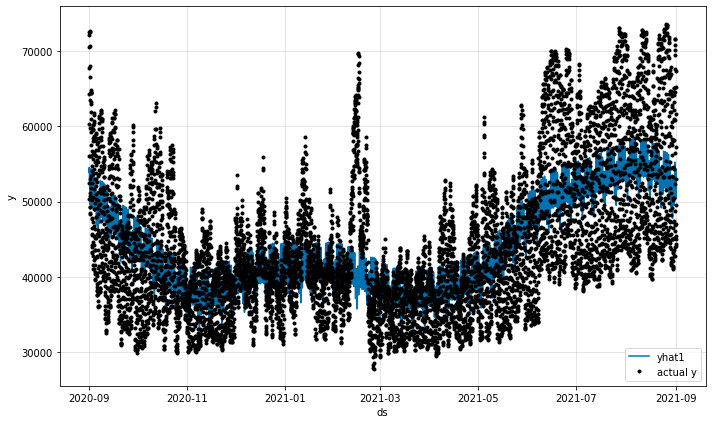

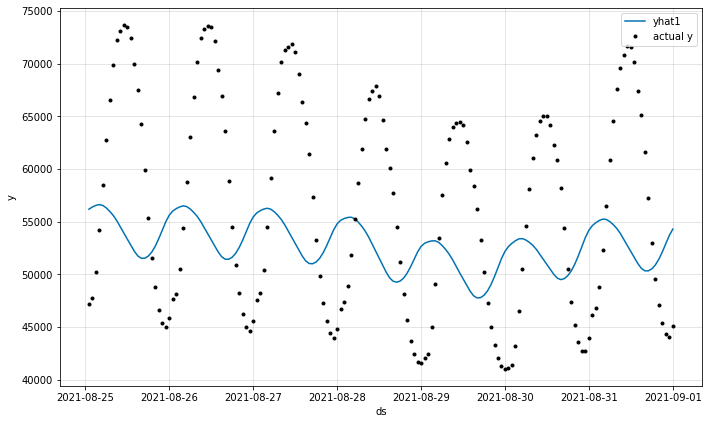

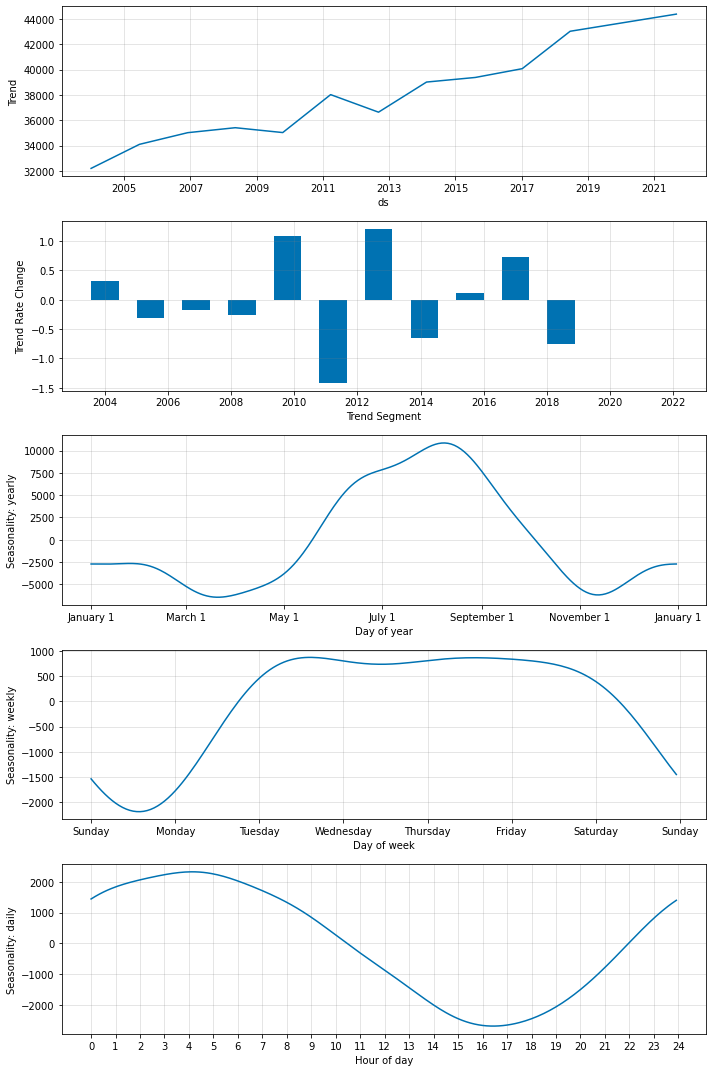

In [6]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast)
param = m.plot_parameters()

##  3-steps ahead AR Model

In [7]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate=0.1,
)
m = m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


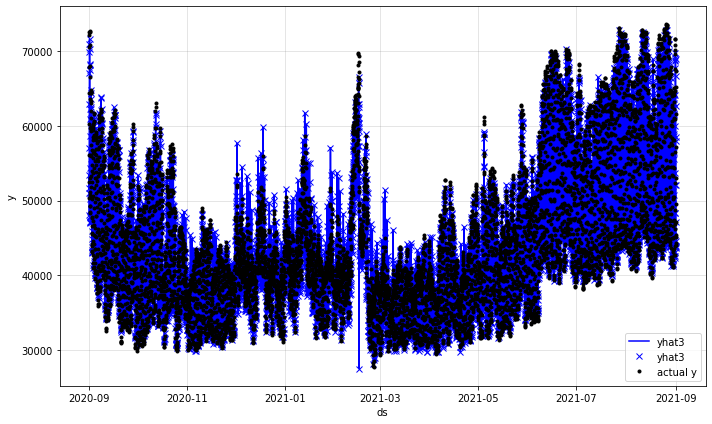

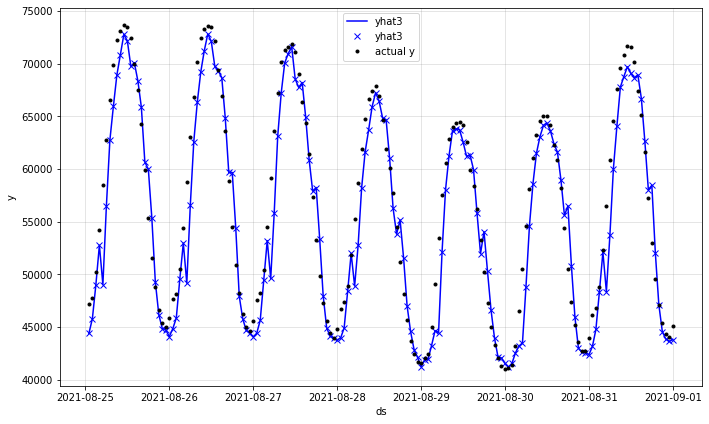

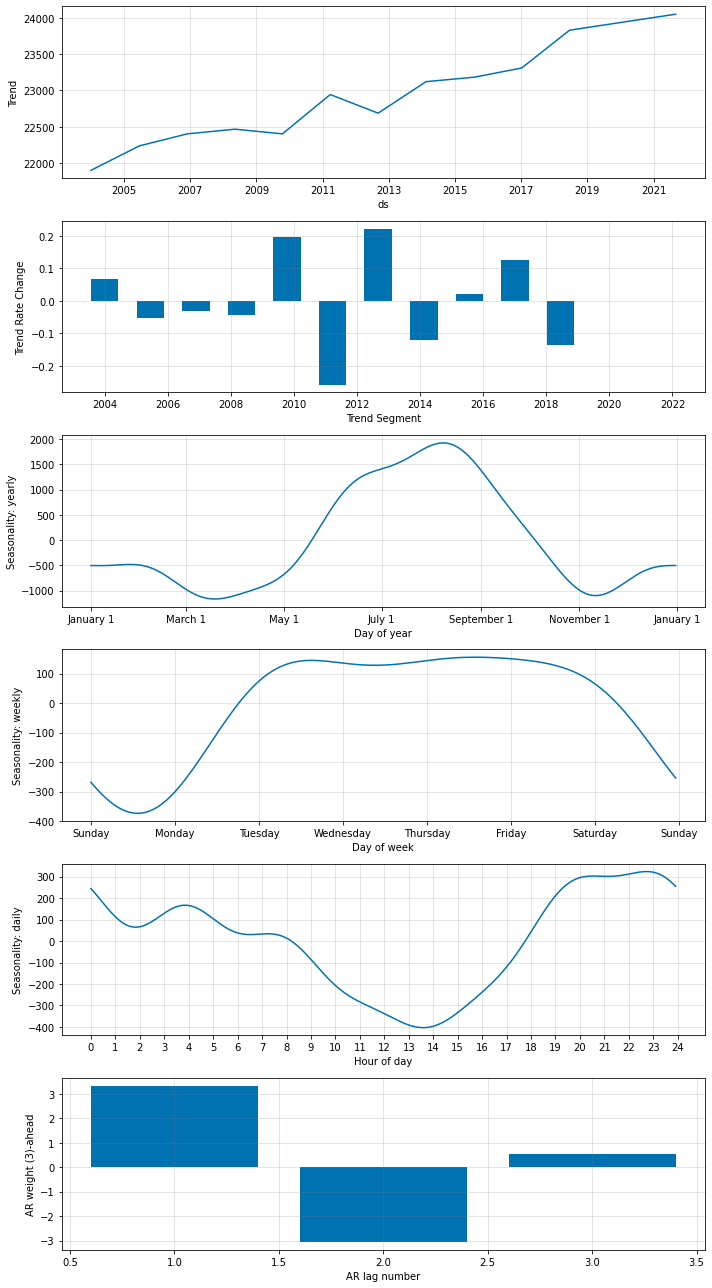

In [8]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 3-steps ahead AR and Lagged Regressors Model

In [9]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate= 0.1,
)
m = m.add_lagged_regressor(names=regions) #, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


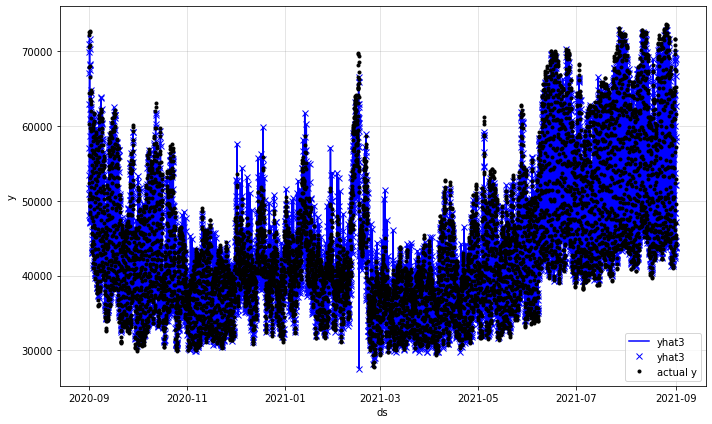

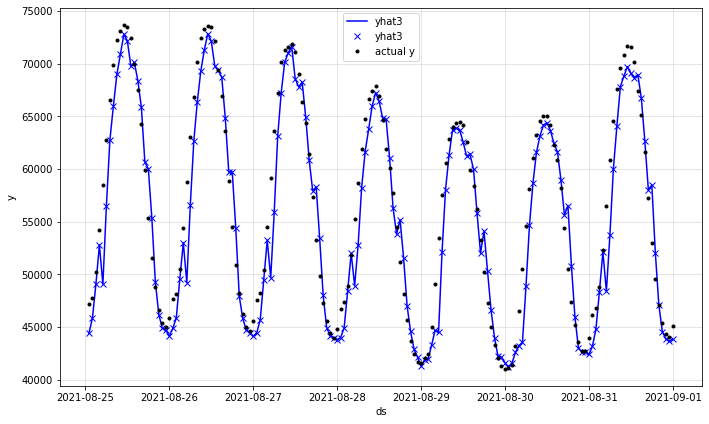

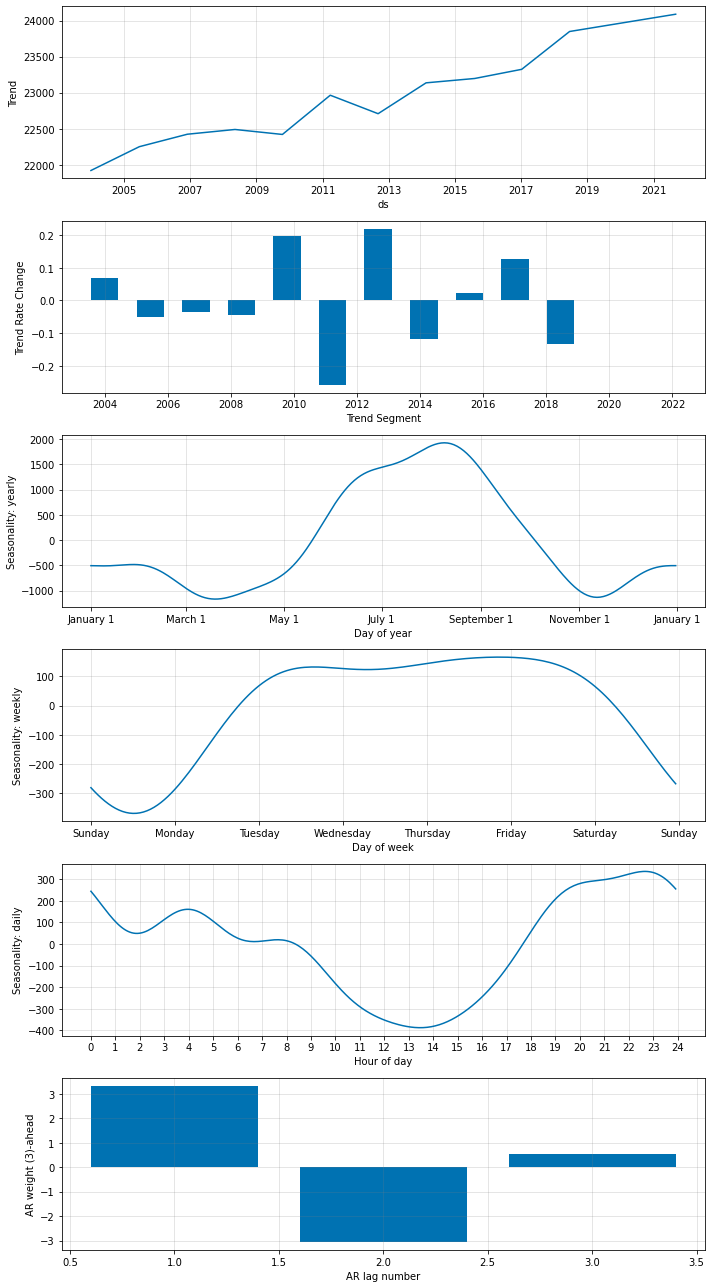

In [10]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model

In [11]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

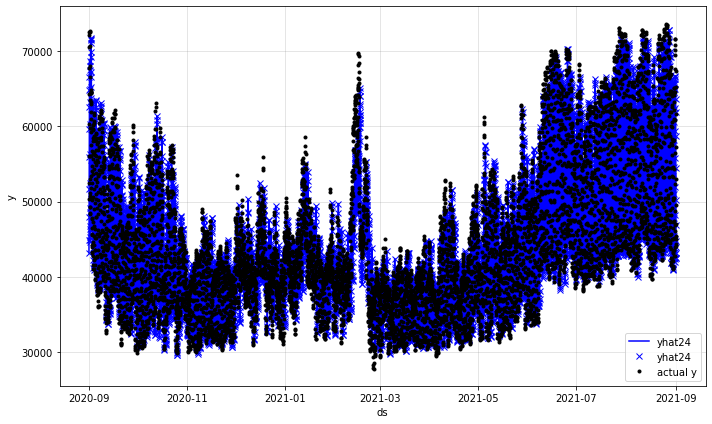

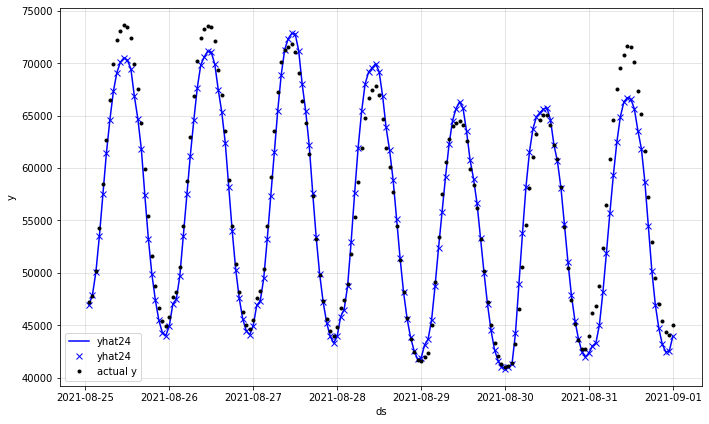

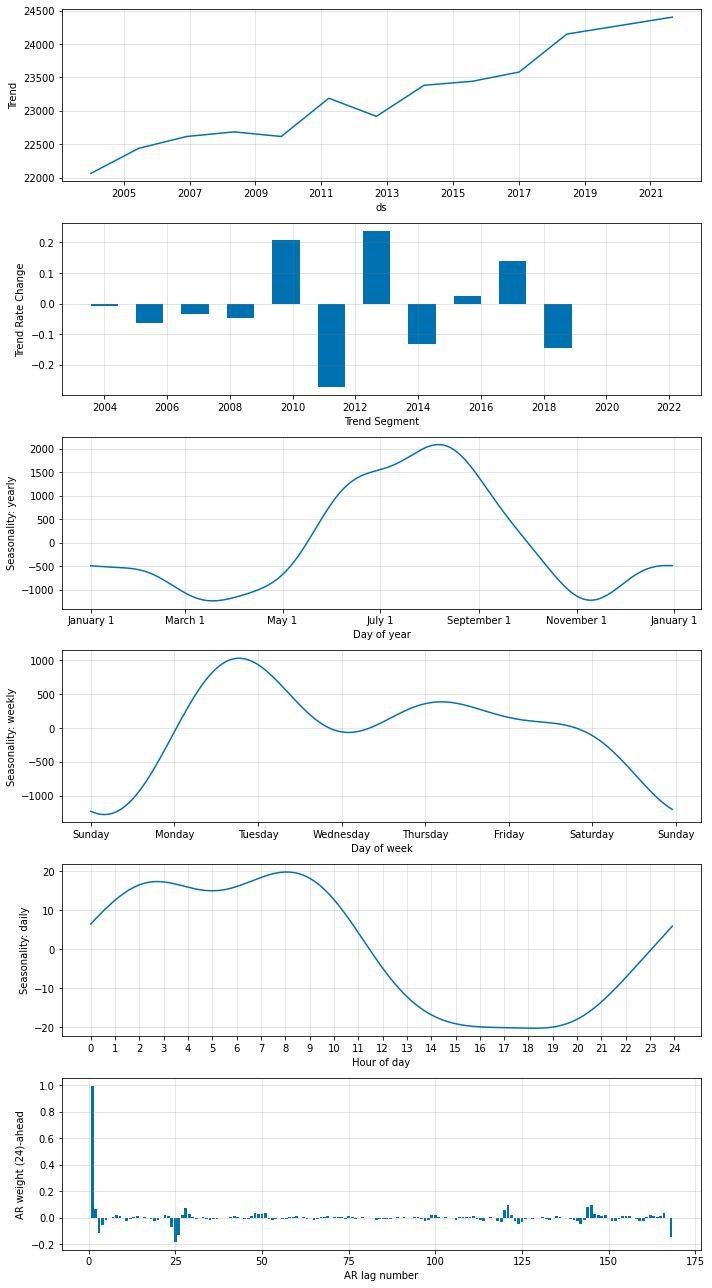

In [12]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model with last observation of Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
)
m = m.add_lagged_regressor(names=regions, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

Epoch[6/52]:  12%| | 6/52 [01:13<09:36, 12.53s/it, SmoothL1Loss=0.00595, MAE=3.06e+3, RMSE=3.95e+3, SmoothL1Loss-24=0.00673, MAE-24=3.33e+3, RMSE-24=4.1

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead AR Model with full Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=24,
    learning_rate=0.01,
)
m = m.add_lagged_regressor(names=regions)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR and Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
)
m = m.add_lagged_regressor(names=regions)#, only_last_value=True)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()